# Trabajo Práctico 1

## Cavallero, Guarino y Guerrieri 

1) Utilizando información disponible en la página del INDEC, expliquen brevemente cómo se identifica a las personas desocupadas.

La tasa de desocupación se mide haciendo el cociente entre la cantidad de personas desocupadas sobre la población economicamente activa. Esto significa que solamente estamos contabiliznado las personas sin ocupación que buscan trabajo activamente y están disponibles para trabajar.

2.a) A partir de ahora, cada grupo trabajará con una región del país en específico. En la Tabla (1), encontrarán la región asignada a cada grupo. Eliminen los datos de todas aquellas provincias que no se encuentren dentro de su región y unan ambos trimestres en una sola base.

In [8]:
!pip install pandas pyreadstat openpyxl
import pandas as pd
# Cargar el .dta de 2004
df_2004 = pd.read_stata(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104.dta")

# Cargar el .xls de 2024
df_2024 = pd.read_excel(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T124.xls.xlsx")
df_2004.head(), df_2024.head()

(     CODUSU  nro_hogar componente h15    ano4       trimestre  \
 0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
 1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
 2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
 3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
 4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   
 
               region mas_500              aglomerado  pondera  ... deccfr  \
 0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
 1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
 2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
 3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
 4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
 
   ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
 0              06      06              04   0.0   0.0   0.0  

In [9]:
# Pasar ambas columnas a mismo type de letra
df_2004.columns = df_2004.columns.str.lower()  # Convertir nombres de columnas a minúsculas
df_2024.columns = df_2024.columns.str.lower()

In [10]:
print(df_2004.columns)  # Nombres de columnas en la base 2004
print(df_2024.columns)  # Nombres de columnas en la base 2024

Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)
Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'pondih'],
      dtype='object', length=177)


In [11]:
print(df_2004.shape)  # Muestra la cantidad de filas y columnas

(45289, 176)


In [12]:
print(df_2024.shape)  # Muestra la cantidad de filas y columnas

(46050, 177)


In [13]:
# Filtrar solo los datos de la región NOA
df_2004 = df_2004[df_2004["region"] == "NOA"]
df_2024 = df_2024[df_2024["region"] == 40]

In [14]:
print(df_2004.shape)

(9393, 176)


In [15]:
print(df_2024.shape)

(9699, 177)


In [ ]:
df_2024.to_excel(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T124_filtrado.xlsx", index=False)
df_2004.to_stata(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado.dta", write_index=False)

In [36]:
print("Valores en región", df_2004['aglomerado'].unique())

Valores en región ['Santiago del Estero - La Banda', 'Jujuy - Palpalá', 'Salta']
Categories (29, object): ['Gran La Plata' < 'Bahía Blanca - Cerri' < 'Gran Rosario' < 'Gran Santa Fe' ... 'Ciudad de Buenos Aires' < 'Partidos del GBA' < 'Mar del Plata - Batán' < 'Río Cuarto']


In [37]:
# Filtrar en cada base
df_2004 = df_2004[df_2004['aglomerado'].isin(["Jujuy - Palpalá", "Santiago del Estero - La Banda", "Salta"])]
df_2024 = df_2024[df_2024['aglomerado'].isin([18, 19, 23])]

In [38]:
print("dataframe_2004_filtrado", df_2004.shape)
print("dataframe_2024_filtrado", df_2024.shape)

dataframe_2004_filtrado (4801, 176)
dataframe_2024_filtrado (4788, 177)


In [44]:
df_2024.to_excel(r"/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T124_filtrado_final.xlsx", index=False)
df_2004.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado_final.dta", write_index=False)

/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_93086/2296019670.py:2: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column componente contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  df_2004.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado_final.dta", write_index=False)
/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykernel_93086/2296019670.py:2: ValueLabelTypeMismatch: 
Stata value labels (pandas categories) must be strings. Column h15 contains
non-string labels which will be converted to strings.  Please check that the
Stata data file created has not lost information due to duplicate labels.

  df_2004.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/usu_individual_T104_filtrado_final.dta", write_index=False)
/var/folders/qv/cfqltfhj5ys0ymt_tsnsthmh0000gn/T/ipykerne

In [54]:
# Verificar las columnas disponibles en ambas bases
print("Columnas 2004:", df_2004.columns.tolist())
print("Columnas 2024:", df_2024.columns.tolist())

Columnas 2004: ['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre', 'region', 'mas_500', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod', 'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2', 'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e', 'pp02h', 'pp02i', 'pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j

In [56]:
# Estandarizar los nombres de las columnas
df_2004.columns = df_2004.columns.str.strip().str.lower()
df_2024.columns = df_2024.columns.str.strip().str.lower()

# Identificar las columnas que existen en ambas bases
columnas_comunes = df_2004.columns.intersection(df_2024.columns)

# Mantener solo las columnas en común
df_2004 = df_2004[columnas_comunes]
df_2024 = df_2024[columnas_comunes]

In [58]:
# Unir las bases de datos
df_unificado = pd.concat([df_2004, df_2024], ignore_index=True)

In [60]:
# Convertir columnas tipo object a string para compatibilidad con Stata
for col in df_unificado.select_dtypes(include=['object']).columns:
    df_unificado[col] = df_unificado[col].astype(str)

In [62]:
df_unificado = df_unificado[df_2004.columns]

In [64]:
import pandas as pd
# Guardar en Stata
ruta_salida = r"/Users/zowi/Desktop/Big Data/GitHub/BigData/data_unificado.dta"
df_unificado.to_stata(ruta_salida, write_index=False)

2.b) Antes de arrancar con la limpieza de la base, cree un heatmap mostrando valores faltantes de las diez (10) variables que más les llamó la atención de la EPH.

Elegimos las siguientes variables que consideramos interesantes, según dean relevantes, comparables entre ambos años y que además tengan sentido social, económico o demográfico para mirar valores faltantes. Vale aclarar que el color amarillo representa valores faltantes en el dataset, mientras que el color violeta representa valores existentes (no nulos).

Variable 	Descripción

ch06 	Edad de la persona
 
ch07	Estado civil

ch08	Tipo de cobertura médica

nivel_ed	Nivel educativo alcanzado

estado	Condición de actividad (ocupado, desocupado, inactivo)

cat_ocup	Categoría ocupacional (patrón, cuenta propia, obrero, etc.)

pp03c	Cantidad de ocupaciones

pp3e_tot	Total de horas trabajadas en la ocupación principal

itf	Ingreso total familiar

adecifr	Decil de ingreso total del hogar a nivel aglomerado




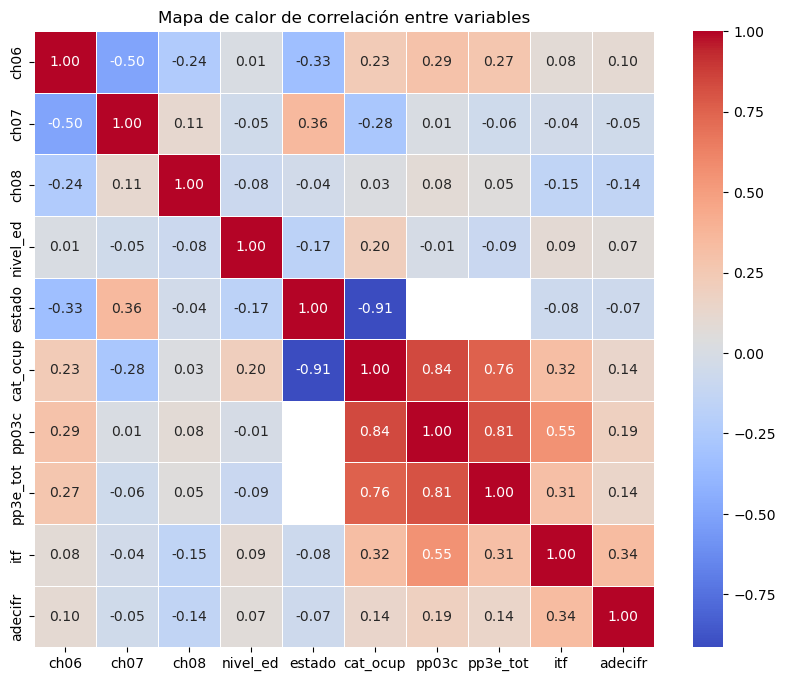

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Stata (.dta)
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado.dta")

# Definir las variables de interés
variables_interes = ['ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_ocup', 'pp03c', 'pp3e_tot', 'itf', 'adecifr']

# Filtrar el dataframe a esas columnas
df_heatmap = df[variables_interes]

# Convertir a números si hay valores categóricos
df_heatmap = df_heatmap.apply(pd.to_numeric, errors='coerce')

# Matriz de correlación
corr_matrix = df_heatmap.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Personalizar etiquetas
plt.title("Mapa de calor de correlación entre variables")

# Mostrar el gráfico
plt.show()


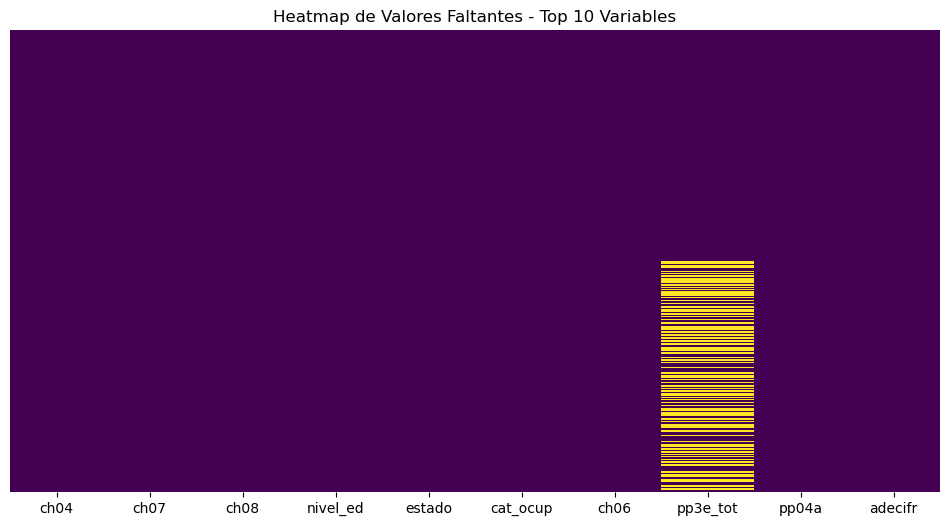

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Si es un archivo Stata (.dta)
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado.dta")

# Calcular el porcentaje de valores nulos por variable
missing_percent = df.isnull().mean() * 100

# Variables elegidas
variables_interes = ['ch04', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_ocup', 'ch06', 'pp3e_tot', 'pp04a', 'adecifr']

# Filtramos el dataframe a esas columnas
df_heatmap = df[variables_interes]

plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Heatmap de Valores Faltantes - Top 10 Variables")
plt.show()


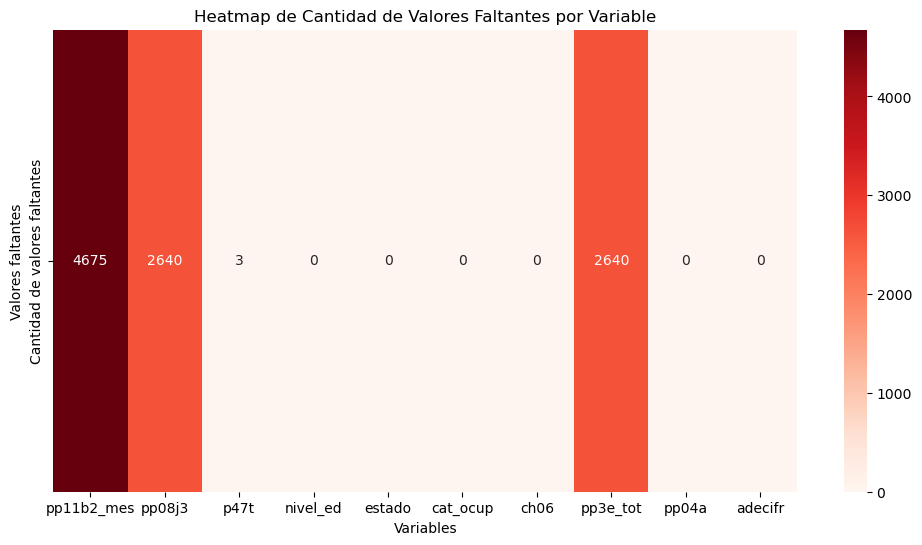

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Stata
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado.dta")

# Variables de interés
variables_interes = ['pp11b2_mes', 'pp08j3', 'p47t', 'nivel_ed', 'estado', 'cat_ocup', 'ch06', 'pp3e_tot', 'pp04a', 'adecifr']

# Filtrar solo las columnas de interés
df_heatmap = df[variables_interes]

# Crear una matriz binaria (1 si hay dato, 0 si es nulo)
df_binary = df_heatmap.notnull().astype(int)

# Sumar los valores presentes por variable para contar los no nulos
missing_counts = df_binary.sum(axis=0)  # Total de valores NO nulos por variable
missing_data = len(df) - missing_counts  # Total de valores nulos por variable

# Convertir en DataFrame para graficar
heatmap_data = pd.DataFrame(missing_data, columns=["Cantidad de valores faltantes"])

# Graficar heatmap con las variables en el eje X y los valores faltantes en el eje Y
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap="Reds", annot=True, fmt=".0f", cbar=True)

plt.xlabel("Variables")
plt.ylabel("Valores faltantes")
plt.title("Heatmap de Cantidad de Valores Faltantes por Variable")
plt.show()


2.c) Si encuentran observaciones con valores que no tienen sentido (por ejemplo, ingresos negativos o edades negativas), asígnenles valores faltantes (missing values). Se espera que piensen en otros casos de valores sin sentido, no únicamente los mencionados en los ejemplos. Expliquen detalladamente cada decisión que tomen.

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos la base
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado.dta")

df[['v2_m', 'v3_m', 'v4_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m', 'v12_m', 'v18_m', 'v19_am', 'v21_m', 't_vi', 'tot_p12', 'p47t', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', 'pp06c', 'pp3e_tot', 'pp3f_tot','ch06', 'itf' ]].min()

# Convertirmos a numérico
cols = ['v2_m', 'v3_m', 'v4_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m', 'v12_m', 'v18_m', 
        'v19_am', 'v21_m', 't_vi', 'tot_p12', 'p47t', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 
        'pp08j1', 'pp08j2', 'pp08j3', 'pp06c', 'pp3e_tot', 'pp3f_tot', 'ch06', 'itf']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

# Reemplazamos valores negativos con NaN
df[cols] = df[cols].where(df[cols] >= 0, np.nan)

# Guardamos la nueva base
df.to_stata("C:\\Users\\caval\\Documents\\GitHub\\BigData\\data_unificado_minimos.dta", write_index=False)


In [74]:
#Corroboramos que haya funcionado y no haya valores negativos en nuestras variables que cuentan horas o ingreso
df[['v2_m', 'v3_m', 'v4_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m', 'v12_m', 'v18_m', 'v19_am', 'v21_m', 't_vi', 'tot_p12', 'p47t', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', 'pp06c', 'pp3e_tot', 'pp3f_tot','ch06', 'itf' ]].min()

v2_m        0.0
v3_m        0.0
v4_m        0.0
v5_m        0.0
v8_m        0.0
v9_m        0.0
v10_m       0.0
v11_m       0.0
v12_m       0.0
v18_m       0.0
v19_am      0.0
v21_m       0.0
t_vi        0.0
tot_p12     0.0
p47t        0.0
pp08d1      0.0
pp08d4      0.0
pp08f1      0.0
pp08f2      0.0
pp08j1      0.0
pp08j2      0.0
pp08j3      0.0
pp06c       0.0
pp3e_tot    0.0
pp3f_tot    0.0
ch06        1.0
itf         0.0
dtype: float64

2.d) Hagan una limpieza profunda de las bases de datos. Asegúrense de que todas las variables tengan el formato correcto. Comenten todos los cambios hechos para lograr una base limpia y ordenada.

In [78]:
import pandas as pd

# Cargamos la base
df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado_minimos.dta") 

# Eliminamos duplicados basados en las tres variables de identificación, manteniendo solo una observación
df = df.drop_duplicates(subset=['codusu', 'nro_hogar', 'ano4'], keep='first')

#Guardamos la base 
df.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_sin_duplicados.dta", write_index=False)

#Pasamos a formato numerico las variables necesarias
cols = ['ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 
        'ch14', 'ch15', 'ch15_cod', 'ch16', 'ch16_cod']

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

#Guardamos la base 
df.to_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado_limpia.dta", write_index=False)

## Parte 2 - Análisis exploratorio
Opciones para calcular la composición por sexo:
✅ Opción 1: Frecuencias absolutas (conteo simple)
Contar cuántos varones y cuántas mujeres hay en cada año.
No se usa ponderador.
Es fácil y rápido, pero no es representativo de la población total (solo de la muestra).
✅ Opción 2: Frecuencias ponderadas usando PONDERA
Sumar el ponderador (PONDERA) para cada grupo (varón/mujer) y año.
Esto es el estándar para EPH: representa la población total proyectada.
Si la consigna dice "composición", suele referirse a esto (pero confirmalo).
✅ Opción 3: Porcentajes simples (sobre el total de la muestra)
Igual que la Opción 1, pero expresando los resultados en porcentaje.
✅ Opción 4: Porcentajes ponderados (suma ponderada y porcentaje sobre el total ponderado)
La combinación más rigurosa:
Se usa PONDERA para representar la población real.
Los resultados se expresan en porcentaje.
Es lo más profesional y lo que usaría si el trabajo es para entregar.

[2004 2024]


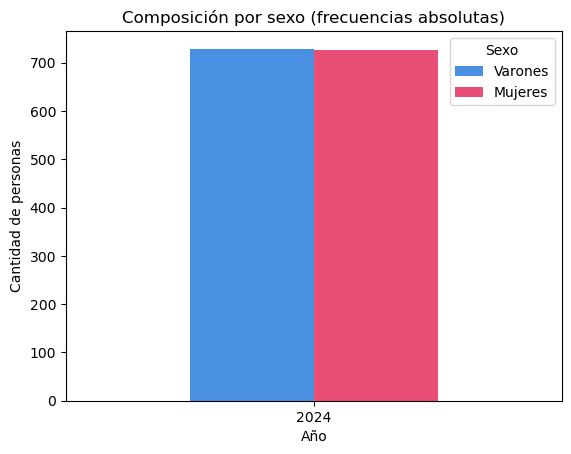

In [104]:
import matplotlib.pyplot as plt

df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado_limpia.dta") 

# Calcular frecuencias absolutas
tabla_abs = (
    df.groupby(['ano4', 'ch04'])
    .size()
    .reset_index(name='count')
)

# Pivotear la tabla
tabla_abs = tabla_abs.pivot(index='ano4', columns='ch04', values='count')
tabla_abs.columns = ['Varones', 'Mujeres']

# Gráfico de barras
tabla_abs.plot(kind='bar', color=['#4A90E2', '#E94E77'])
plt.title('Composición por sexo (frecuencias absolutas)')
plt.ylabel('Cantidad de personas')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.show()



In [122]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_stata("/Users/zowi/Desktop/Big Data/GitHub/BigData/Untitled/data_unificado_limpia.dta") 

# Asegurar que ano4 sea entero
df['ano4'] = df['ano4'].astype(int)
print(df.groupby(['ano4', 'ch04']).size())

# Reordenar y asegurar que estén ambos años (2004 y 2024)
tabla_abs = tabla_abs.reindex([2004, 2024], fill_value=0)

print(df[df['ano4'] == 2004]['ch04'].unique())

# Verificar la tabla después de reindexar
print(tabla_abs)

ano4  ch04
2024  1.0     729
      2.0     726
dtype: int64
[nan]
      Varones  Mujeres
ano4                  
2004      NaN      NaN
2024    729.0    726.0


In [126]:
# Verificar el número de observaciones para 2004 y 2024
print(df[df['ano4'] == 2004].shape)
print(df[df['ano4'] == 2024].shape)
# Verificar si hay valores nulos en ch04 para el año 2004
print(df[df['ano4'] == 2004]['ch04'].isnull().sum())

(1155, 172)
(1455, 172)
1155


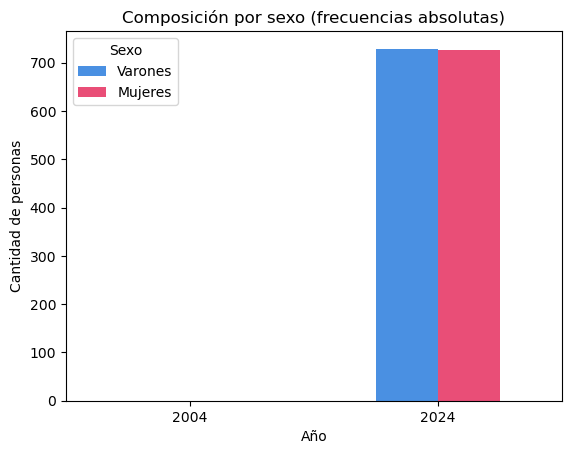

In [110]:
# Asegurar que ano4 sea entero
df['ano4'] = df['ano4'].astype(int)

# Calcular frecuencias absolutas
tabla_abs = (
    df.groupby(['ano4', 'ch04'])
    .size()
    .reset_index(name='count')
)

# Pivotear la tabla
tabla_abs = tabla_abs.pivot(index='ano4', columns='ch04', values='count')
tabla_abs.columns = ['Varones', 'Mujeres']

# Reordenar y asegurar que estén ambos años
tabla_abs = tabla_abs.reindex([2004, 2024])

# Rellenar valores nulos con 0
tabla_abs = tabla_abs.fillna(0)

# Gráfico de barras
tabla_abs.plot(kind='bar', color=['#4A90E2', '#E94E77'])
plt.title('Composición por sexo (frecuencias absolutas)')
plt.ylabel('Cantidad de personas')
plt.xlabel('Año')
plt.xticks(rotation=0)
plt.legend(title='Sexo')
plt.show()
